In [1]:
import sys
sys.path.append('..')

import pandas as pd
from data import dataset_loader
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py

In C:\Users\Clark Xu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Clark Xu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Clark Xu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Load Data

In [2]:
# Specify EDA inputs here only.

output_dataset_path = '../data/csvs/translated_dataset.csv'

In [3]:
dataset_loader.load_dataset('../data/csvs/f1_public.csv', output_dataset_path)
df = pd.read_csv(output_dataset_path)

input dataset loaded from ../data/csvs/f1_public.csv
output dataset loaded to ../data/csvs/translated_dataset.csv


In [4]:
df.shape

(32159, 27)

In [5]:
df.head()

,Age - Injury,Sex,Height - Admission,Weight - Admission,Level of Injury - Admission,Anal Sensation - Admission,Anal Contraction - Admission,ASIA - Admission,Neurologic Category - Admission,Level of Injury - Discharge,...,Family Income - Injury,Veteran,Primary Insurance,Depression - History,Anxiety - History,Diabetes - History,Daily Alcohol - History,Loss of Consciousness - Injury,Loss of Memory - Injury,TBI Likelihood - Injury
0,15-29y,Male,Unknown,Unknown,C04,Unknown,Unknown,A,Complete Tetraplegic,C04,...,Unknown,Unknown,Medicaid,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,15-29y,Male,Unknown,Unknown,T10,Unknown,Unknown,A,Complete Paraplegic,T10,...,Unknown,Unknown,Private Insurance,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,15-29y,Male,Unknown,Unknown,Unknown,Unknown,Unknown,D,Incomplete Tetraplegic,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,15-29y,Male,Unknown,Unknown,C05,Unknown,Unknown,A,Complete Tetraplegic,C05,...,Unknown,Unknown,Medicaid,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,15-29y,Male,Unknown,Unknown,C05,Unknown,Unknown,A,Complete Tetraplegic,C06,...,Unknown,Unknown,Private Insurance,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


### Univariate Analysis

In [6]:
#Print Column Names
total = df.shape[0]
for col in df:
    print(col,"Missingness:",round(df[df[col]=='Unknown'].shape[0]/total*100,3),"%")

Age - Injury Missingness: 0.0 %
Sex Missingness: 0.0 %
Height - Admission Missingness: 77.251 %
Weight - Admission Missingness: 77.341 %
Level of Injury - Admission Missingness: 32.324 %
Anal Sensation - Admission Missingness: 92.997 %
Anal Contraction - Admission Missingness: 92.991 %
ASIA - Admission Missingness: 32.622 %
Neurologic Category - Admission Missingness: 31.556 %
Level of Injury - Discharge Missingness: 5.302 %
ASIA - Discharge Missingness: 4.204 %
Neurologic Category - Discharge Missingness: 3.147 %
Race Missingness: 5.252 %
Marital Status - Injury Missingness: 0.634 %
Education - Injury Missingness: 5.883 %
Occupation Status - Injury Missingness: 1.231 %
Occupation Code - Injury Missingness: 64.396 %
Family Income - Injury Missingness: 91.029 %
Veteran Missingness: 63.139 %
Primary Insurance Missingness: 40.042 %
Depression - History Missingness: 88.734 %
Anxiety - History Missingness: 88.715 %
Diabetes - History Missingness: 88.709 %
Daily Alcohol - History Missingness

In [7]:
#Print Column Names
for col in df:
    print(df[col].describe())

count      32159
unique         6
top       15-29y
freq       15210
Name: Age - Injury, dtype: object
count     32159
unique        3
top        Male
freq      25937
Name: Sex, dtype: object
count       32159
unique         42
top       Unknown
freq        24843
Name: Height - Admission, dtype: object
count       32159
unique        302
top       Unknown
freq        24872
Name: Weight - Admission, dtype: object
count       32159
unique         36
top       Unknown
freq        10395
Name: Level of Injury - Admission, dtype: object
count       32159
unique          3
top       Unknown
freq        29907
Name: Anal Sensation - Admission, dtype: object
count       32159
unique          3
top       Unknown
freq        29905
Name: Anal Contraction - Admission, dtype: object
count     32159
unique        5
top           A
freq      11056
Name: ASIA - Admission, dtype: object
count       32159
unique          7
top       Unknown
freq        10148
Name: Neurologic Category - Admission, dtype: ob

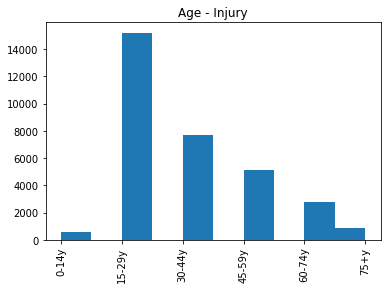

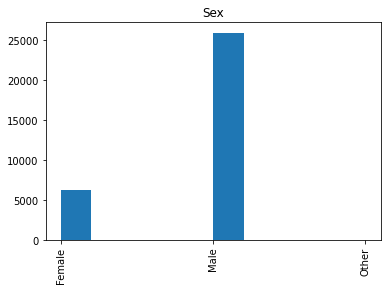

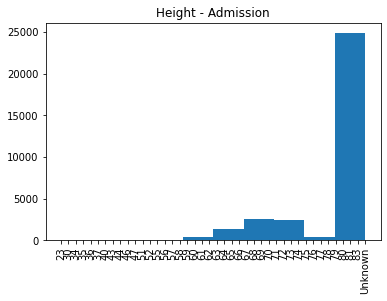

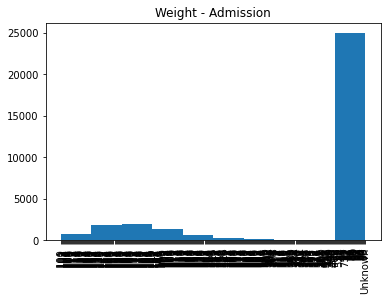

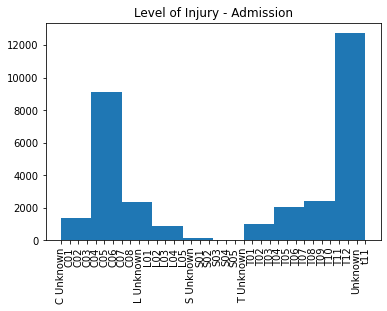

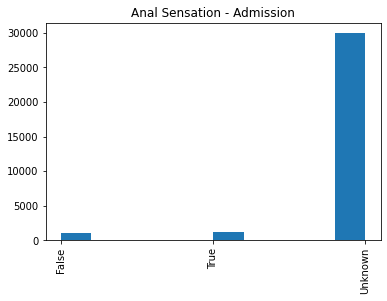

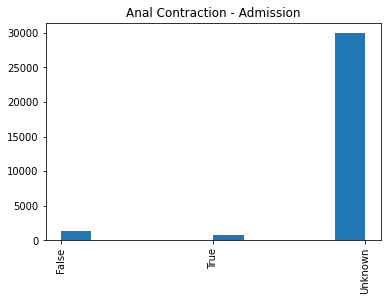

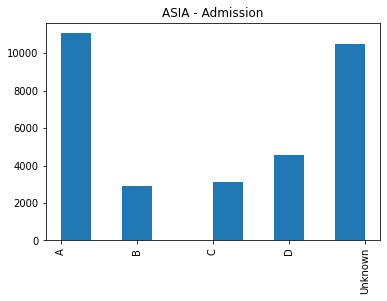

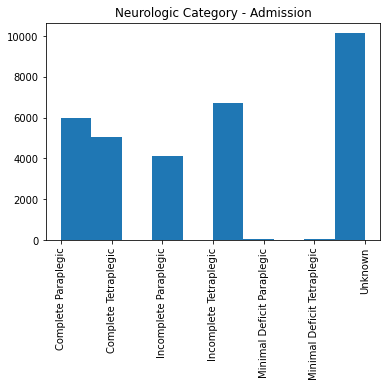

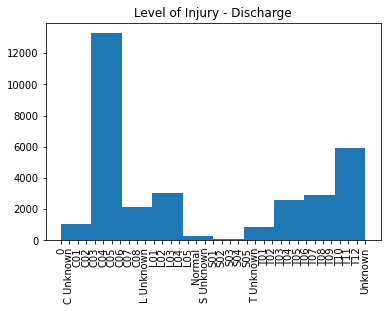

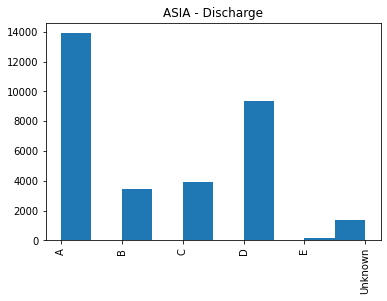

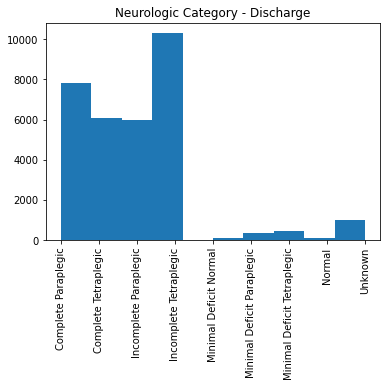

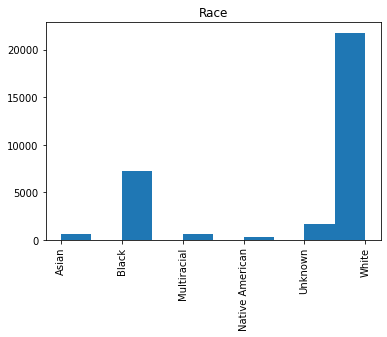

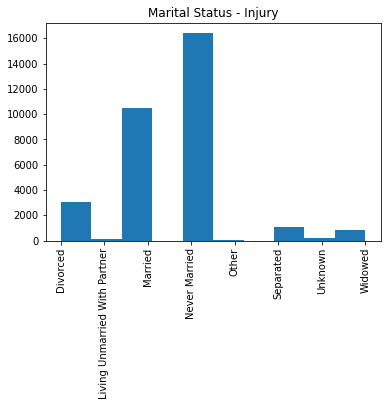

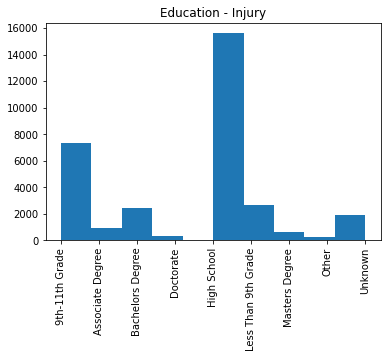

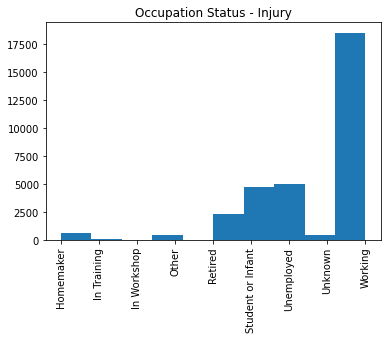

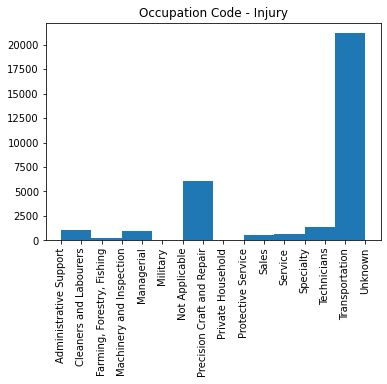

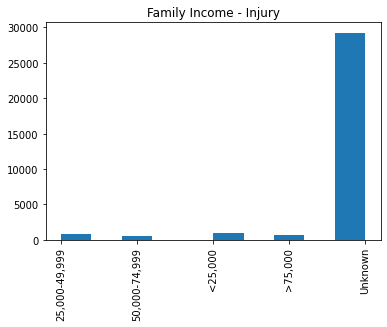

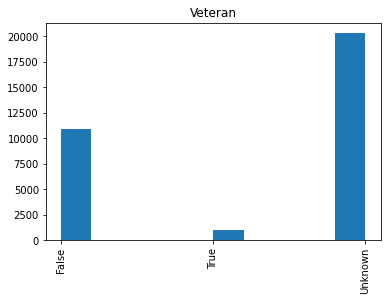

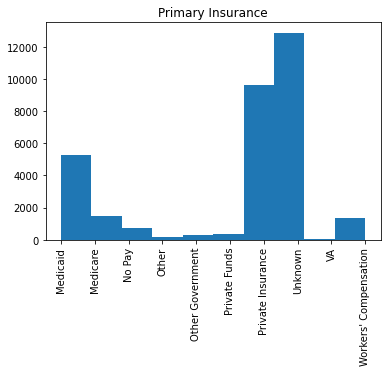

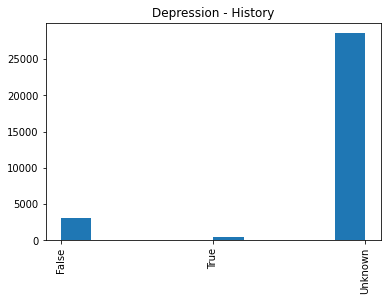

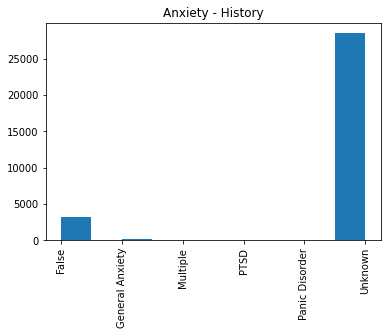

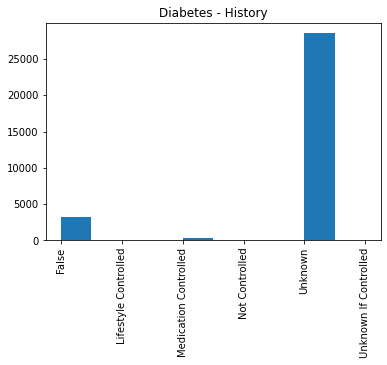

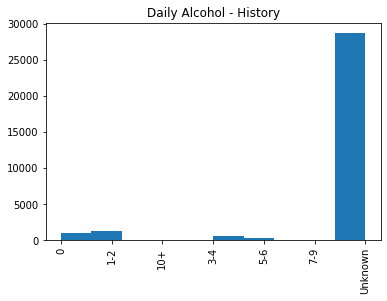

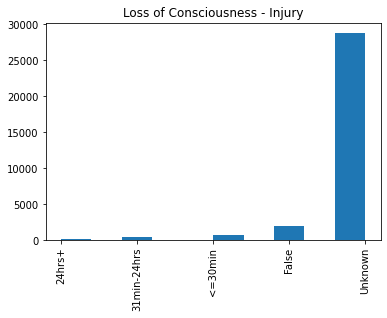

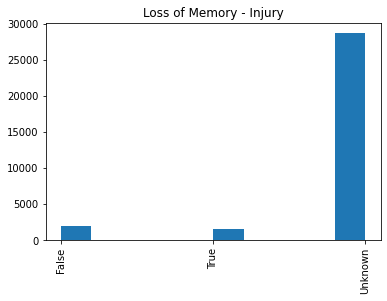

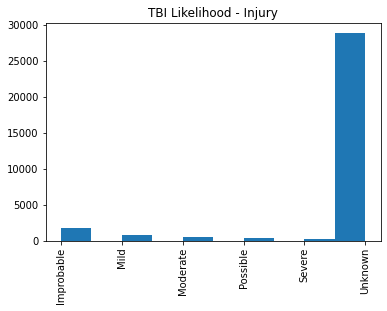

In [8]:
#Print Histogram of Each Column in Dataframe
for col in df:
    #Order Data
    df.sort_values(col, inplace=True)
    
    #Make Histogram
    plt.figure()
    plt.title(col)
    plt.hist(df[col])
    plt.xticks(rotation = 90)
    plt.show()

### Bivariate Analysis

In [9]:
#Sankey Diagram Helper Function from Kenlok
#At: https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [10]:
#Get ASIA Migration
asiaList = ['ASIA - Admission','ASIA - Discharge']
df_asia = df[asiaList].groupby(asiaList).size().to_frame('count').reset_index()

In [11]:
#Verify Groupby
df_asia.head(6)

,ASIA - Admission,ASIA - Discharge,count
0,A,A,9787
1,A,B,555
2,A,C,360
3,A,D,199
4,A,E,3
5,A,Unknown,152


In [12]:
fig = genSankey(df_asia,cat_cols=asiaList,value_cols='count',title='ASIA Admission to Discharge')
plotly.offline.plot(fig, validate=False, show_link = True, filename = 'ASIA-Admission-to-Discharge.html')

'ASIA-Admission-to-Discharge.html'

In [13]:
#Get Neurologic Migration
#neuroList = ['Neurologic Category - Admission','Neurologic Category - Discharge']
#df_neuro = df[neuroList].groupby(neuroList).size().to_frame('count').reset_index()
#fig = genSankey(df_neuro,cat_cols=neuroList,value_cols='count',title='Neurologic Category Admission to Discharge')
#plotly.offline.plot(fig, validate=False, show_link = True, filename = 'Neurologic-Category-Admission-to-Discharge.html')